## Oscillator Demo

We look at solutions of linear second order differential equations with constant coefficients, examining how solutions depend on parameters, initial conditions, and forcing functions.

$$
\begin{equation}
m\frac{d^2y}{dt^2} + \gamma\frac{dy}{dt} + ky = g(t)
\end{equation}
$$

The parameters in the equation are the mass $m$, damping constant $\gamma$, and spring constant $k$.

We first import some modules, define SymPy symbols, and define a function to produce a basic plot of our solutions.

In [59]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sym.init_printing(use_unicode=True)

t,g = sym.symbols('t,g')
y = sym.Function('y')

    
def plot(*expressions,labels=None,title=None,xlower=0,xupper=20,resolution=100):
    ''' 
    plot produces a plot of multiple functions provided by expressions tuple
    
    Parameters
    ----------
    expressions : required tuple of SymPy expressions
    labels : optional list of labels for the functions
    xlower : lower x bound of plot
    xupper : upper x bound of plot
    resolution : number of data points used to generate plot
    
    Returns
    -------
    ax : handle for Matplotlib Axes object
    '''

    xx = np.linspace(xlower,xupper,resolution)
    yy = np.zeros(resolution)
    fig, ax = plt.subplots()

    for k,expression in enumerate(expressions):

        # Generate numerical function
        Yn = sym.lambdify(t,expression,"numpy")

        # Populate y values for function
        for i in range(resolution):
            yy[i] = Yn(xx[i])

        # Set label as generic or user supplied
        try:
            function_label = str(labels[k])
        except:
            function_label = "Function " + str(k+1)
        
        ax.plot(xx,yy,label=function_label);

    ax.axhline(ls = ':',color='k');
    ax.axvline(ls = ':',color='k');
    ax.grid(True)
    ax.set_xlabel('t')
    ax.set_ylabel('y(t)')

    if labels != None:
        ax.legend(shadow=True)
    if title != None:
        ax.set_title(title)
    
    return ax

We first look at the free motion (unforced) case where $g(t) = 0$.  In this case the form of the solution, and motion of the mass, can be categorized into three regimes depending on the dimensionless quantity $\gamma^2/4km$.

Eq(y(t)/4 + Derivative(y(t), t) + Derivative(y(t), (t, 2)), 0)


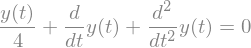

In [34]:
## First and second derivatives
Dy = y(t).diff(t)
D2y = y(t).diff(t,t)

## Parameters for spring-mass system
## Note that we must define rational numbers explicitly to avoid the default float

# Mass
m = 1
# Damping constant
gamma = 1
# Spring constant
k = sym.Rational(1,4)

# The ode is defined as a SymPy Equality object
ode = sym.Eq(m*D2y + gamma*Dy + k*y(t),0)
# Python print function shows the code for the equation...
print(ode) 
# ... while the standard output might display in a more advanced way depending on the environnment.
ode

### Free undamped motion $\gamma = 0$

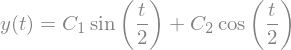

In [77]:
m = 1
gamma = 0
k = sym.Rational(1,4)

f_ode = sym.Eq(m*D2y + gamma*Dy + k*y(t),0)

f_soln = sym.dsolve(f_ode,y(t))
f_soln

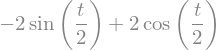

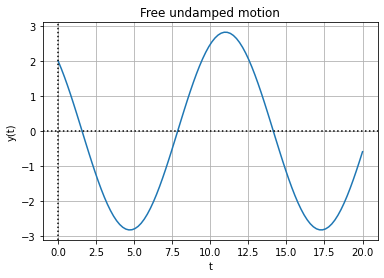

In [80]:
f_soln = sym.dsolve(f_ode,y(t),ics={y(0): 2, y(t).diff(t).subs(t, 0): -1})
Y0 = f_soln.rhs
P = plot(Y0,title='Free undamped motion')

The solution is a combination of sine and cosine functions with frequency $\omega_0 = \sqrt{k/m}$.  This is the natural frequency of the oscillator.  Note that the solution could be written as $R\cos\left(\omega_0 t - \delta\right)$, which is known as the phase-amplitude form.  The amplitude $R$ and the phase lag $\delta$ can be computed with trigonometric identities.

### Critically damped case:  $\gamma^2/4km = 1$

The values $m=1$, $\gamma = 1$, $k=0.25$ fall in the critically damped regime.  Note that if we want a symbolic solution, we must explicitly define non-integer parameters as SymPy $\texttt{Rational}$ objects.

In [35]:
m = 1
gamma = 1
k = sym.Rational(1,4)

cd_ode = sym.Eq(m*D2y + gamma*Dy + k*y(t),0)

cd_soln = sym.dsolve(cd_ode,y(t))
cd_soln

The result of $\texttt{dsolve}$ is an equality object.  This allows for the possibility of implicitly defined solutions.  If we want to use the expression on the right-hand side, we need to extract it.

In [36]:
Y = cd_soln.rhs
Y

We can apply initial conditions by supplying $\texttt{dsolve}$ a Python dictionary containing the conditions.  We will use the conditions $y(0) = 2$ and $y'(0)=-1$ for these examples.

In [37]:
cd_soln = sym.dsolve(cd_ode,y(t),ics={y(0): 2, y(t).diff(t).subs(t, 0): -1})
Y1 = cd_soln.rhs
Y1

To plot the solution we need to evaluate the expression at some values of $t$ and store the results in an array.  We make use of the simple plotting function defined above.

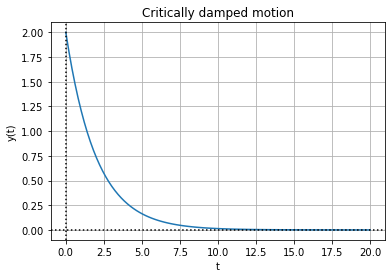

In [49]:
plot(Y1,xlower=0,xupper=20,title="Critically damped motion");

### Overdamped case:  $\gamma^2/4km > 1$

The values $m=1$, $\gamma = 2$, $k=0.25$ fall in the critically damped regime.  

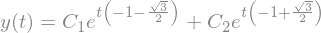

In [42]:
m = 1
gamma = 2
k = sym.Rational(1,4)

od_ode = sym.Eq(m*D2y + gamma*Dy + k*y(t),0)

od_soln = sym.dsolve(od_ode,y(t))
od_soln

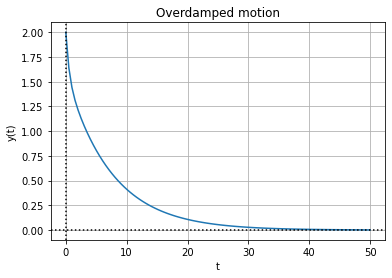

In [50]:
od_soln = sym.dsolve(od_ode,y(t),ics={y(0): 2, y(t).diff(t).subs(t, 0): -1})
Y2 = od_soln.rhs
P=plot(Y2,xlower=0,xupper=50,title="Overdamped motion")

### Underdamped case:  $\gamma^2/4km < 1$

The values $m=1$, $\gamma = 0.5$, $k=0.25$ fall in the critically damped regime.  

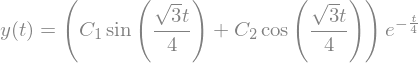

In [11]:
m = 1
gamma = sym.Rational(1,2)
k = sym.Rational(1,4)

ud_ode = sym.Eq(m*D2y + gamma*Dy + k*y(t),0)

ud_soln = sym.dsolve(ud_ode,y(t))
ud_soln

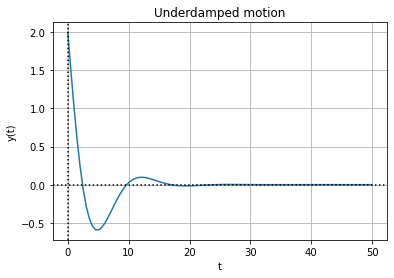

In [52]:
ud_soln = sym.dsolve(ud_ode,y(t),ics={y(0): 2, y(t).diff(t).subs(t, 0): -1})
Y3 = ud_soln.rhs
P = plot(Y3,xlower=0,xupper=50,title="Underdamped motion")

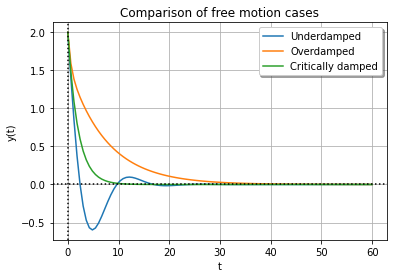

In [103]:
P = plot(Y3,Y2,Y1,xupper=60,labels=['Underdamped','Overdamped','Critically damped'],
         title='Comparison of free motion cases');

### Forced undamped motion

We now look at some cases where $\gamma = 0$ and $g(t) = A\cos\left(\omega t\right)$.  First we take $A=4$, and $\omega = 1/3$.  To illustrate the effect that is purely due to the forcing, we set the initial conditions to zero.

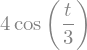

In [70]:
gamma = 0
k = sym.Rational(1,4)
omega = sym.Rational(1,3)
A = 4
g = A*sym.cos(omega*t)
g

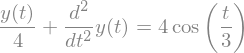

In [71]:
f1_ode = sym.Eq(m*D2y + gamma*Dy + k*y(t),g)
f1_ode

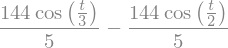

In [75]:
f1_soln = sym.dsolve(f1_ode,y(t),ics={y(0): 0, y(t).diff(t).subs(t, 0): 0})
Y4 = f1_soln.rhs
Y4

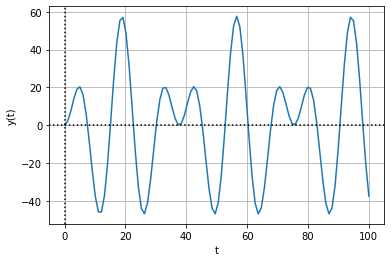

In [76]:
P = plot(Y4,xlower=0,xupper=100)

The solution is a combination of sinusoidal functions with different frequencies, the natural frequency and the forcing frequency.  It is interesting to plot the forcing function in order to observe its magnitude compared to the response of the system.

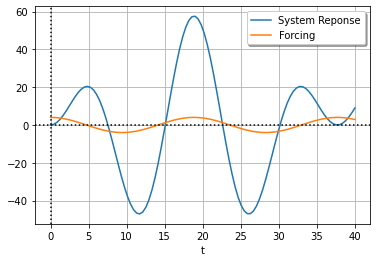

In [83]:
P = plot(Y4,g,labels=['System Reponse','Forcing'],xupper = 40)
P.set_ylabel('');

### Beat example

When the forcing frequency $\omega$ is close to $\omega_0$, we see a phenomenon known as a beat.  The solution can be viewed as a fast-varying oscillation with a slow-varying amplitude. (*Note here we change $k$ to make $\omega_0=1$*.)

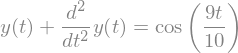

In [84]:
gamma = 0
k = 1
omega = sym.Rational(9,10)
A = 1
g = A*sym.cos(omega*t)
b_ode = sym.Eq(m*D2y + gamma*Dy + k*y(t),g)
b_ode

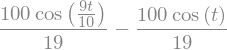

In [85]:
b_soln = sym.dsolve(b_ode,y(t),ics={y(0): 0, y(t).diff(t).subs(t, 0): 0})
Y5 = b_soln.rhs
Y5

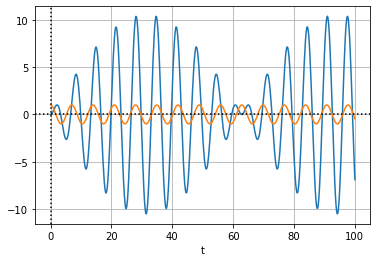

In [89]:
P = plot(Y5,g,xupper=100,resolution=500)
P.set_ylabel('');

### Resonance

When $\omega = \omega_0$ we observe the resonance phenomonon.  The amplitude of the solution grows without bound. 

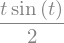

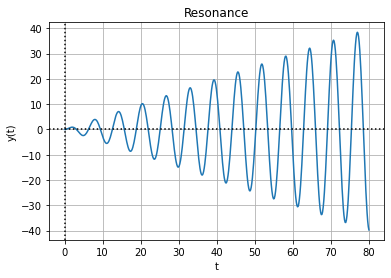

In [91]:
gamma = 0
k = 1
omega = 1
A = 1
g = A*sym.cos(omega*t)
r_ode = sym.Eq(m*D2y + gamma*Dy + k*y(t),g)

r_soln = sym.dsolve(r_ode,y(t),ics={y(0): 0, y(t).diff(t).subs(t, 0): 0})
Y6 = r_soln.rhs

P = plot(Y6,title="Resonance",xupper=80,resolution=500);
Y6

### Forced damped motion

In the case of forced undamped motion, we might view the solution as consisting of two parts.  The **transient** is the part of the solution that is due to the initial conditions.  This part of the solution always decays to zero as $t\to\infty$ for any nonzero value of $\gamma$.  The **steady-state** is the part of the solution that is due to the continual forcing applied to the system.

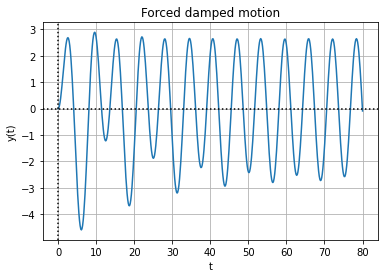

In [93]:
gamma = sym.Rational(1,10)
k = sym.Rational(1,4)
omega = 1
A = 2
g = A*sym.cos(omega*t)
fd_ode = sym.Eq(m*D2y + gamma*Dy + k*y(t),g)

fd_soln = sym.dsolve(fd_ode,y(t),ics={y(0): 0, y(t).diff(t).subs(t, 0): 0})
Y7 = fd_soln.rhs

P = plot(Y7,title="Forced damped motion",xupper=80,resolution=500);

In [97]:
print(Y7)

(-1000*sqrt(11)*sin(3*sqrt(11)*t/20)/7557 + 600*cos(3*sqrt(11)*t/20)/229)*exp(-t/20) + 80*sin(t)/229 - 600*cos(t)/229


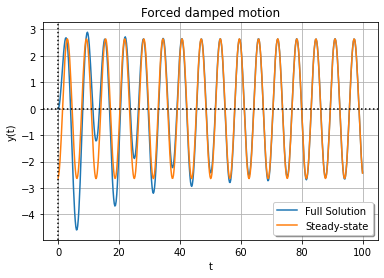

In [101]:
Y7_SS = sym.sympify('80*sin(t)/229 - 600*cos(t)/229')
Y7_T = sym.sympify('(-1000*sqrt(11)*sin(3*sqrt(11)*t/20)/7557 + 600*cos(3*sqrt(11)*t/20)/229)*exp(-t/20)')
plot(Y7,Y7_SS,labels=['Full Solution','Steady-state'],title='Forced damped motion',xupper=100,resolution=500);

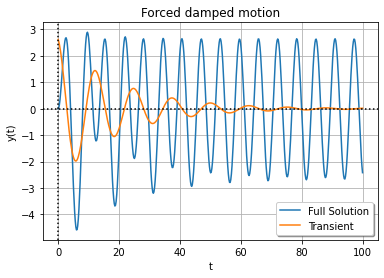

In [102]:
plot(Y7,Y7_T,labels=['Full Solution','Transient'],title='Forced damped motion',xupper=100,resolution=500);